# Where are the Wolves?
***By: Sam Daitzman and Mary Fung***

### Background
#### A Species in Danger
In the early 1900s, most of the last gray wolves living in and around the Greater Yellowstone Area were hunted and killed. The sudden removal of these predators caused an imbalance in the ecosystem. By the mid-1900s, wolves had been nearly eliminated from most of the lower 48 states, and by 1978, all subspecies of wolves were considered endangered in the lower 48 states except for Minnesota. With the passing of the Endangered Species Act in 1973, the U.S. Fish and Wildlife Service attempted to restore endangered species and native species where possible.

#### The Yellowstone Restoration
Between 1995 and 1996, 31 gray wolves were reintroduced to Yellowstone National Park from Canada. Wolves were acclimated to the park and observed by a team of volunteers and rangers. This team continued to observe the wolf population, producing annual reports from 1995 to 2016.

### Question
Looking at data for the Yellowstone reintroduced wolf population, what were the chances that the Yellowstone Wolf Project would fail?

### Approach
We modeled the initial explosion in wolf population at Yellowstone using a quadratic population growth model. Once we had a model that matched the initial population explosion and eventual slowing of growth, we added stochasticity to our model to match the real-world data. In some of these simulations, the wolf population will die off before reaching a carrying/significant population. We kept track of the percentage of simulations in which this happened. This metric represented the percentage chance of failure according to our model.

In [120]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions that let us model, simulate and read data
from modsim import *
from pandas import read_html, read_csv

### Data
Using the published annual reports for the Yellowstone Wolf Project, we created a table that stated the number of wolves in Yellowstone National Park for each year from 1995 to 2016.

In [121]:
# imports wolf population data
wolfData = read_csv('data/wolves.csv', index_col=0)
wolves = wolfData["YNP Wolves"]

Year
1995     21
1996     52
1997     86
1998    112
1999    118
2000    119
2001    132
2002    148
2003    174
2004    171
2005    118
2006    136
2007    171
2008    124
2009     96
2010     97
2011     98
2012     83
2013     95
2014    104
2015     98
2016    108
Name: YNP Wolves, dtype: int64

### Historical Wolf Population at Yellowstone
Using the data we found, we plotted a graph of Yellowstone's wolf population over time in years.

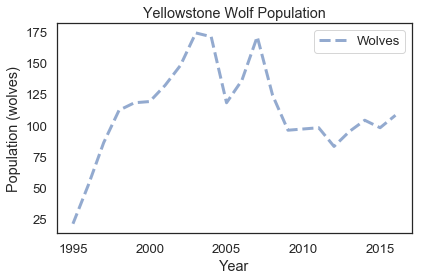

In [122]:
plot(wolves, '--', label='Wolves')
decorate(xlabel='Year',
    ylabel='Population (wolves)',
    title='Yellowstone Wolf Population')

The following cells set up a basic foundation for our quadratic growth model.

In [123]:
t_0 = get_first_label(wolves)
t_end = get_last_label(wolves)
p_0 = get_first_value(wolves);

In [124]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [125]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in wolves
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

### Simulating the Initial Wolf Population Explosion
Using a quadratic function, we created a best-fit curve for the wolf population data. Using this equation, we altered the initial number of wolves to see how the population would be expected to react based on our projection.

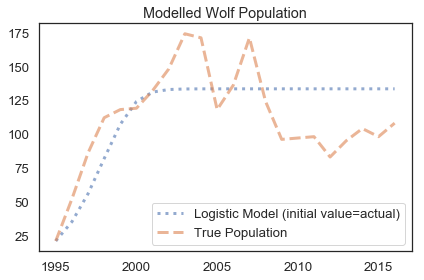

In [136]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.8,
                beta=-0.006)

results = run_simulation(system, update_func_quad)
plot(results, ':', label='Logistic Model (initial value=actual)')
plot(wolves, '--', label='True Population')
decorate(title='Modelled Wolf Population')

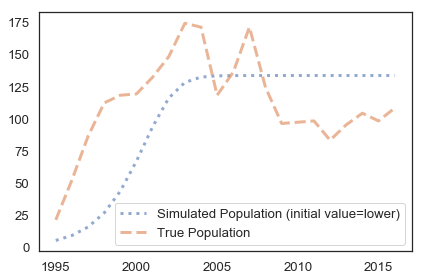

In [139]:
system2 = System(t_0=t_0, 
                t_end=t_end,
                p_0=5,
                alpha=0.8,
                beta=-0.006)

results = run_simulation(system2, update_func_quad)
plot(results, ':', label='Simulated Population (initial value=lower)')
plot(wolves, '--', label='True Population')
decorate()

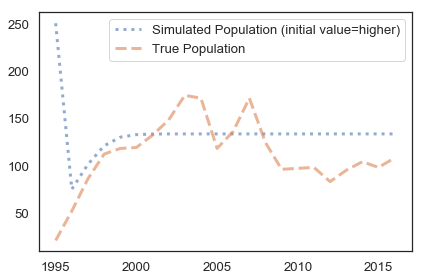

In [140]:
system3 = System(t_0=t_0, 
                t_end=t_end,
                p_0=250,
                alpha=0.8,
                beta=-0.006)

results = run_simulation(system3, update_func_quad)
plot(results, ':', label='Simulated Population (initial value=higher)')
plot(wolves, '--', label='True Population')
decorate()

### Stochasticity
By adding randomness into our equation, we could better simulate how the population might have reacted.

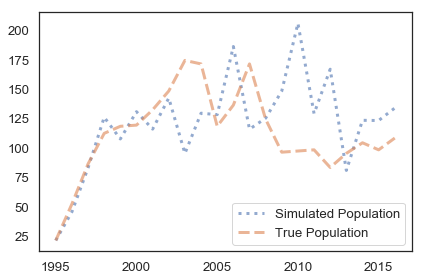

In [129]:
def run_extinction_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the wolf population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        if(results[t] <= 0): results[t] = 0
        results[t+1] = update_func(results[t], t, system)
        
    return results

def update_func_stochastic_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current wolf population
    t: what year it is
    system: system object with model parameters
    """
    if(pop == 0):
        return pop
    net_growth = (system.alpha * pop) + (system.beta * np.random.uniform(low=0.5, high=1.5) * pop**2) + (np.random.uniform(low=1, high=20))
    return pop + net_growth

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.8,
                beta=-0.006)

results = run_extinction_simulation(system, update_func_stochastic_quad)
plot(results, ':', label='Simulated Population')
plot(wolves, '--', label='True Population')
decorate()

### Counting Failure
By running the previous function multiple times, under the actual and other starting conditions, we simulated the Yellowstone Wolf Project and kept track of the number of times the project failed.

In [130]:
extinctions = 0

system_real = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.8,
                beta=-0.006)

for i in range(1, 1001):
    results = run_extinction_simulation(system_real, update_func_stochastic_quad)
    if(get_last_value(results) == 0):
        extinctions += 1
        
print(extinctions / 1000)

0.083


In [131]:
extinctions = 0

system_300 = System(t_0=t_0, 
                t_end=t_end,
                p_0=300,
                alpha=0.8,
                beta=-0.006)

for i in range(1, 1001):
    results = run_extinction_simulation(system_300, update_func_stochastic_quad)
    if(get_last_value(results) == 0):
        extinctions += 1
        
print(extinctions / 1000)

0.579


### Results and Interpretation
In the looped simulation we ran, out of 1000 trials under the actual starting conditions, only a small percent of them failed. (In this instance, failure meant the wolf population hitting zero and no wolves surviving within the measured time).
With this in mind, based on our projection, the Yellowstone project had a very small chance of failing.

### Sources Cited
#### Yellowstone Wolf Project Reports
https://www.nps.gov/yell/learn/nature/wolfreports.htm
#### Wolf Restoration
https://www.nps.gov/yell/learn/nature/wolf-restoration.htm